In [16]:
import tensorflow as tf
import numpy as np # as dealing with  2d data

In [17]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0,3], 
    cov=[[1,0.5] , [0.5,1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5] , [0.5,1]],
    size=num_samples_per_class)


#Stacking the two classes into an array with shape (2000 , 0)

In [18]:
inputs = np.vstack((negative_samples , positive_samples)).astype(np.float32)

##Generating Corresponding targets (0 and 1)

In [19]:
targets = np.vstack((np.zeros((num_samples_per_class, 1) , dtype="float32"),
                   np.ones((num_samples_per_class, 1) , dtype="float32")))

# Plotting two points classes

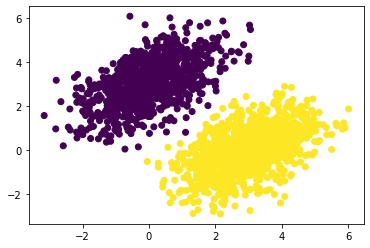

In [20]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0], inputs[: ,1], c=target[: , 0])
plt.show()

#Creating the linear classifier variables

In [21]:
input_dim = 2 
output_dim = 1
W = tf.Variable(initial_value = tf.random.uniform(shape=(input_dim , output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape=(output_dim,)))

# The Forward pass function

In [22]:
def model(inputs):
    return tf.matmul(inputs, W) + b 

# The Mean Squared Function error losss

In [23]:
def square_loss(targets,predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

# The Training function

In [24]:
learning_rate = 0.2

def training_step(inputs , targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W , grad_loss_wrt_b = tape.gradient(loss, [W , b])
    W.assign_sub(grad_loss_wrt_W *learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

# Training the Batch loop


In [26]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at Step {step} : {loss:.4f}")

Loss at Step 0 : 1651041641114370048.0000
Loss at Step 1 : 5090442518219194368.0000
Loss at Step 2 : 15694704952293195776.0000
Loss at Step 3 : 48389449563817115648.0000
Loss at Step 4 : 149192961471344017408.0000
Loss at Step 5 : 459987603209205055488.0000
Loss at Step 6 : 1418220536618406641664.0000
Loss at Step 7 : 4372618624657912758272.0000
Loss at Step 8 : 13481528862233300303872.0000
Loss at Step 9 : 41565864674424935940096.0000
Loss at Step 10 : 128154620147639183736832.0000
Loss at Step 11 : 395122736846598163136512.0000
Loss at Step 12 : 1218230760847934884937728.0000
Loss at Step 13 : 3756013330211663580758016.0000
Loss at Step 14 : 11580432430989124330061824.0000
Loss at Step 15 : 35704480199718061945651200.0000
Loss at Step 16 : 110083029741942078447812608.0000
Loss at Step 17 : 339404853945650865644765184.0000
Loss at Step 18 : 1046443651186438471191363584.0000
Loss at Step 19 : 3226367119317654768390766592.0000
Loss at Step 20 : 9947440683756971334502973440.0000
Loss at 

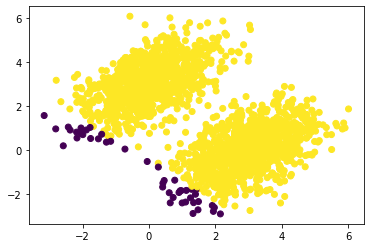

In [29]:
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:, 1], c=predictions[:,0] > 0.5)
plt.show()

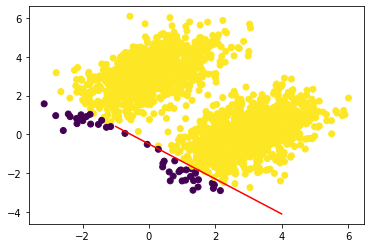

In [30]:
x = np.linspace(-1 , 4 , 100)
y = -W[0] / W[1] * x + (0.5 -b) / W[1]
plt.plot(x , y, "-r")
plt.scatter(inputs[:,0] , inputs[:,1], c=predictions[:,0] > 0.5)